# Suicide Data Analysis
This notebook analyzes suicide rates in the United States using a cleaned dataset broken down by sex, age, race, ethnicity, and year.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_suicide_data.csv")

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


## Q1: What is the overall trend in suicide rates in the U.S. from 1950 to the most recent year?

Rows found: 84


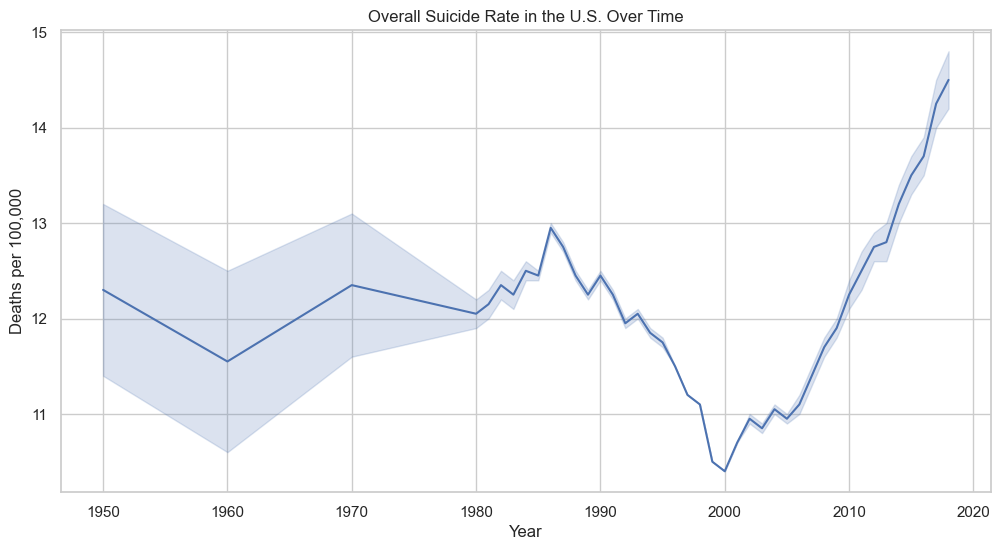

In [6]:
overall = df[
    (df["Sex"] == "All persons") &
    (df["AgeGroup"].str.lower().str.strip() == "all ages")
]

print(f"Rows found: {len(overall)}")

sns.lineplot(data=overall, x="YEAR", y="SuicideRate")
plt.title("Overall Suicide Rate in the U.S. Over Time")
plt.ylabel("Deaths per 100,000")
plt.xlabel("Year")
plt.show()


## Q2: How do suicide rates compare between males and females over time?

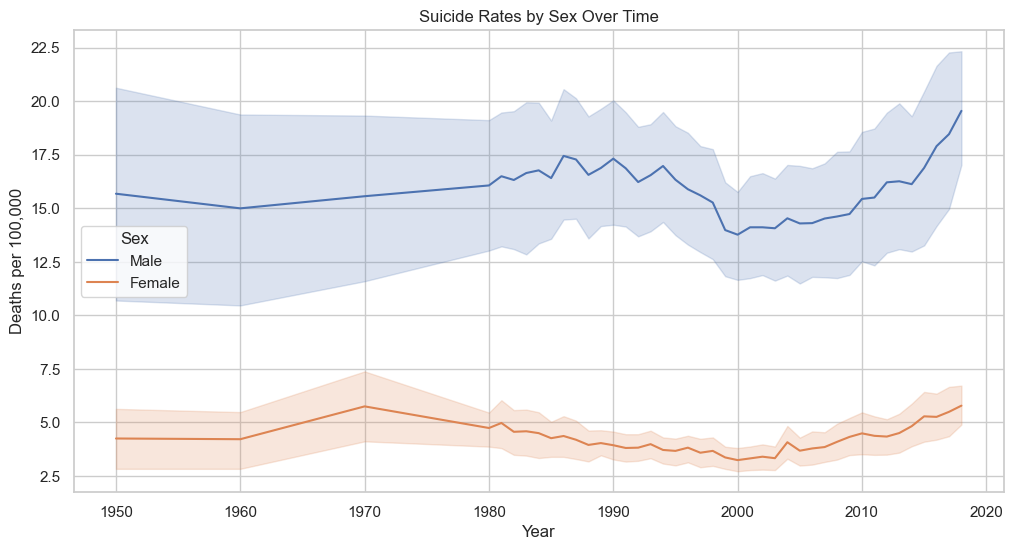

In [7]:
sex_overall = df[
    df["Sex"].isin(["Male", "Female"]) & 
    df["AgeGroup"].str.lower().str.strip().eq("all ages")
]
sns.lineplot(data=sex_overall, x="YEAR", y="SuicideRate", hue="Sex")
plt.title("Suicide Rates by Sex Over Time")
plt.ylabel("Deaths per 100,000")
plt.xlabel("Year")
plt.show()


## Q3: Which age group consistently shows the highest suicide rates?

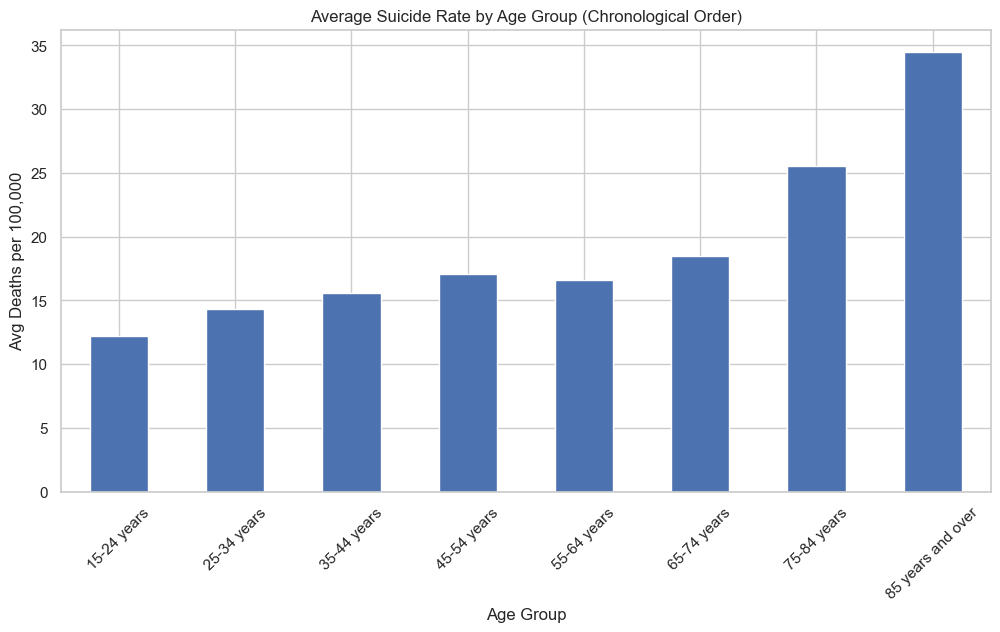

In [8]:
age_order = ["15-24 years", "25-34 years", "35-44 years", 
    "45-54 years", "55-64 years", "65-74 years", "75-84 years", "85 years and over"
]

df["AgeGroup_cleaned"] = df["AgeGroup"].str.strip().str.lower()
age_grouped = df[df["AgeGroup_cleaned"] != "all ages"]
avg_rates = age_grouped.groupby("AgeGroup")["SuicideRate"].mean()

avg_rates = avg_rates.reindex(age_order)

avg_rates.plot(kind="bar")
plt.title("Average Suicide Rate by Age Group (Chronological Order)")
plt.ylabel("Avg Deaths per 100,000")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


## Q4: How have suicide rates changed over time among White vs Black populations (including both race and ethnicity columns)?

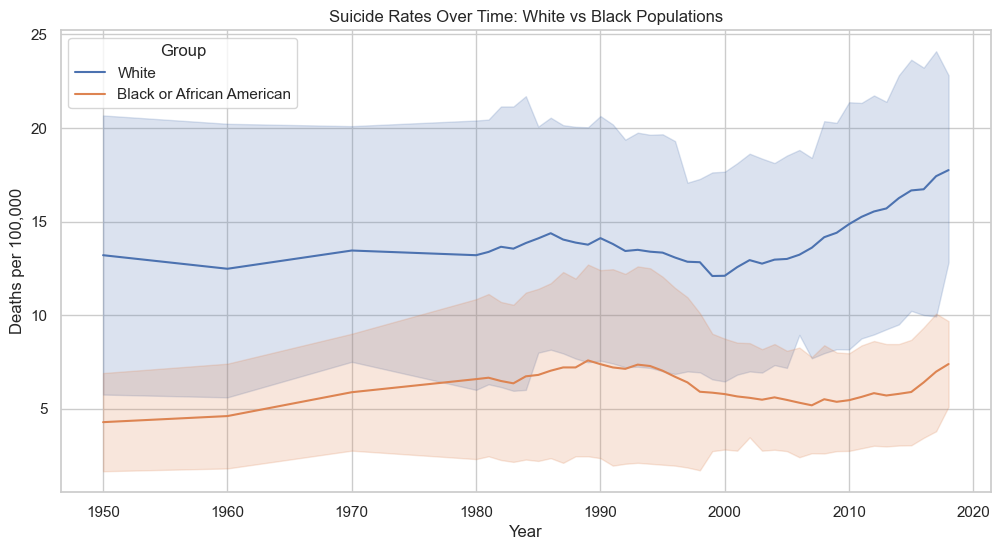

In [9]:
black_white = df[
    (df["Race"].isin(["White", "Black or African American"]) | df["Ethnicity"].isin(["Black or African American"])) &
    df["AgeGroup"].str.lower().str.strip().eq("all ages")
].copy()

black_white["Group"] = black_white["Race"].combine_first(black_white["Ethnicity"])

sns.lineplot(data=black_white, x="YEAR", y="SuicideRate", hue="Group")
plt.title("Suicide Rates Over Time: White vs Black Populations")
plt.ylabel("Deaths per 100,000")
plt.xlabel("Year")
plt.show()


## Q5: Are suicide rates higher for Hispanic or Latino vs Not Hispanic or Latino people?

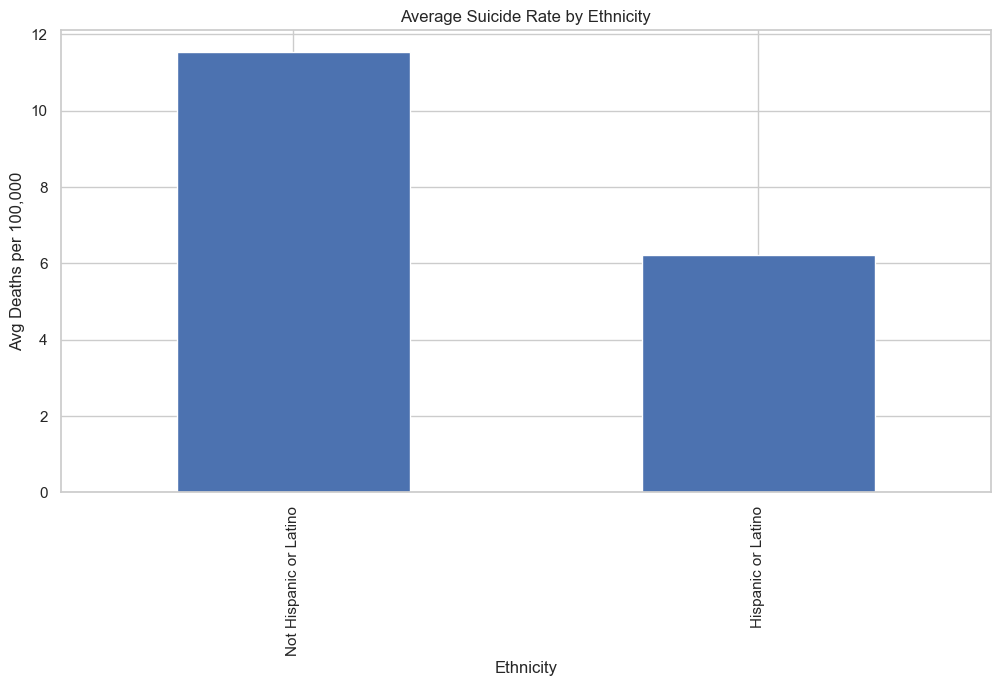

In [10]:
ethnicity_filtered = df[
    df["Ethnicity"].isin(["Hispanic or Latino", "Not Hispanic or Latino"]) &
    df["AgeGroup"].str.lower().str.strip().eq("all ages")
]
eth_avg = ethnicity_filtered.groupby("Ethnicity")["SuicideRate"].mean().sort_values(ascending=False)
eth_avg.plot(kind="bar")
plt.title("Average Suicide Rate by Ethnicity")
plt.ylabel("Avg Deaths per 100,000")
plt.show()


## Q6: What’s the average suicide rate for young adults (15–24) vs seniors (65+)?

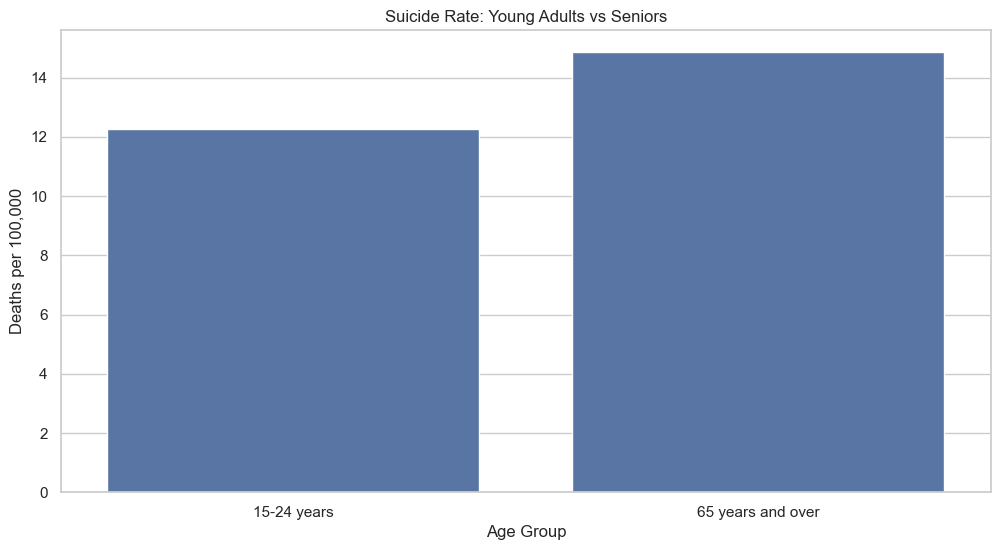

In [11]:
young_old = df[
    df["AgeGroup"].isin(["15-24 years", "65 years and over"]) &
    df["Sex"].isin(["Male", "Female"])
]
sns.barplot(data=young_old, x="AgeGroup", y="SuicideRate", errorbar=None)
plt.title("Suicide Rate: Young Adults vs Seniors")
plt.ylabel("Deaths per 100,000")
plt.xlabel("Age Group")
plt.show()


## Q7: What’s the average suicide rate for young adults (15–24) vs seniors (65+)?

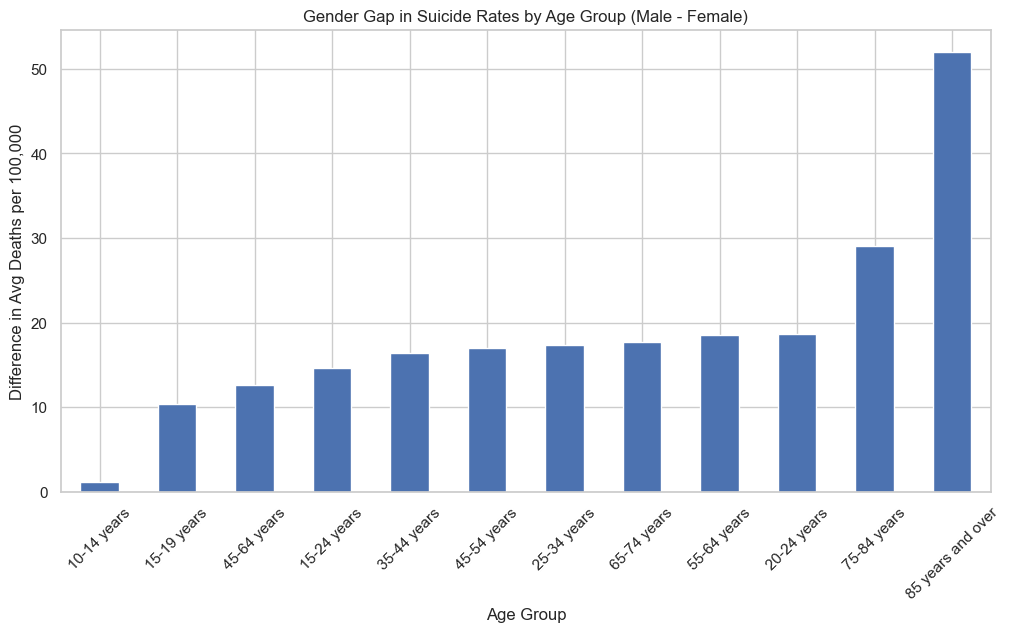

In [18]:
# Filter only Male and Female
sexed = df[
    df["Sex"].isin(["Male", "Female"]) &
    df["AgeGroup"].notna() &
    ~df["AgeGroup"].isin(["All ages", "25-44 years", "65 years and over"])
]

# Group by Sex + AgeGroup
grouped = sexed.groupby(["Sex", "AgeGroup"])["SuicideRate"].mean().reset_index()

# Pivot to have Male/Female side by side
pivot = grouped.pivot(index="AgeGroup", columns="Sex", values="SuicideRate").dropna()

# Calculate the difference (Male - Female)
pivot["Gap"] = pivot["Male"] - pivot["Female"]

# Sort by size of gender gap
pivot_sorted = pivot.sort_values("Gap", ascending=True)

# Plot
pivot_sorted["Gap"].plot(kind="bar")
plt.title("Gender Gap in Suicide Rates by Age Group (Male - Female)")
plt.ylabel("Difference in Avg Deaths per 100,000")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


## Q8: Has the suicide rate for Asian or Pacific Islander males aged 15–24 changed over time?

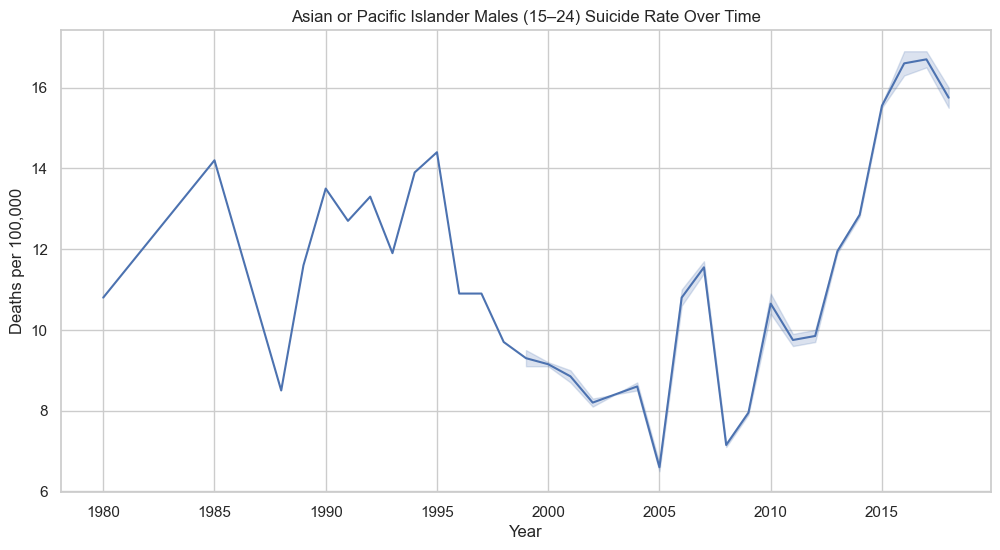

In [19]:
asian_males = df[
    (df["Sex"] == "Male") &
    ((df["Race"] == "Asian or Pacific Islander") | (df["Ethnicity"] == "Asian or Pacific Islander")) &
    (df["AgeGroup"] == "15-24 years")
]
sns.lineplot(data=asian_males.sort_values("YEAR"), x="YEAR", y="SuicideRate")
plt.title("Asian or Pacific Islander Males (15–24) Suicide Rate Over Time")
plt.ylabel("Deaths per 100,000")
plt.xlabel("Year")
plt.show()
